In [1]:
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show

EPSG:32645


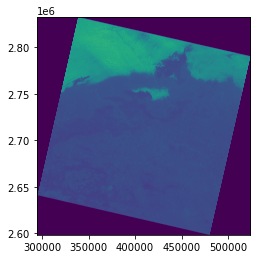

<AxesSubplot:>

In [2]:
ras = rio.open('LC08_L1TP_140043_20180109_20180119_01_T1/LC08_L1TP_140043_20180109_20180119_01_T1_B3.TIF')
print(ras.crs)
show(ras)

In [3]:
def project2WGS84 (ipRas, op_file_name): 
    # Checking the extension
    if op_file_name.endswith('.tif'):
        None
    else:
        op_file_name = op_file_name + '.tif'
        
    # Re-project to WGS 84
    op_crs = {'init': 'EPSG:4326'}
    transform, width, height = calculate_default_transform(
        ipRas.crs, op_crs, ipRas.width, ipRas.height, *ipRas.bounds)           # Transform parameters
    kwargs = ipRas.meta.copy()                                                 # Make a copy of Input metadata
    
    if ipRas.crs is None:
        raise Exception("Check data projections as well as integrity of proj package")
    # update the the copied parameters with required output output parameters 
    kwargs.update({
        'crs': op_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
    
    # writing output image
    opRas = rio.open(op_file_name, 'w', **kwargs)
    reproject(
        source= rio.band(ipRas, 1),
        destination= rio.band(opRas, 1),
        src_crs= ipRas.crs,
        dst_crs= op_crs,
        resampling=Resampling.nearest)
    opRas.close()
    return rio.open(op_file_name)

EPSG:4326


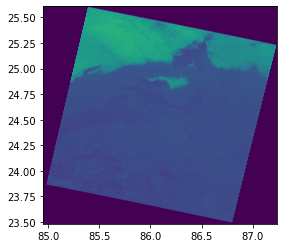

<AxesSubplot:>

In [4]:
ras_wgs = project2WGS84(ipRas=ras, op_file_name='ras_wgs84')
print (ras_wgs.crs)
show(ras_wgs)